# DSA project -> the analysis of flexn tweets

1000 twwets from 2010 to 2021 were collected by using the twitter API and were put into a csv by using twarc. The tweets were about the dance style known as flexn, a combination of hiphop and contortion. 

## Opening the data

In [18]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA
from operator import itemgetter
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
import warnings
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
from tensorflow.python.ops.numpy_ops import np_config
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF

warnings.filterwarnings('ignore')

nltk.download('stopwords')

# constants
sw = stopwords.words('english')
plt.style.use('ggplot')
# nltk.download('punkt')
# nltk.download('stopwords')

# import data
lines = []
theFile = pd.read_csv("tweets_2010_to_2021.csv")


2022-12-07 13:42:49.091054: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 13:42:50.998690: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-07 13:42:52.013498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-07 13:42:52.013531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Cleaning the data

In [19]:

nltk.download('punkt')

theWords = theFile["text"].tolist()

# remove new lines
theWords = [line.rstrip('\n') for line in theWords]

# make all characters lower
theWords = [line.lower() for line in theWords]

# remove punctuations from each line
theWords = [line.translate(str.maketrans('', '', string.punctuation)) for line in theWords]


#remove emojis 
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)




for i in range(0,len(theWords)):
    theWords[i] = remove_emojis(theWords[i])


from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


#stemming
ps = PorterStemmer()

for i in range(0,len(theWords)):
    for j in range(0,len(theWords[i])):
        if(theWords[i][j] == '#'):
            theWords[i] = lines[i].replace(theWords[i][j],"")

            


  


            
# tokenize
lines = [word_tokenize(line) for line in theWords]
#for i in range(0,len(lines)):
#    for j in range(0,len(lines[i])):
        #lines[i][j] = ps.stem(lines[i][j])





[nltk_data] Downloading package punkt to /home/dc17540/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of 
    lines.
    
    params:
        lines (Array / List) : The list of lines you want to remove the stopwords from
        sw (Set) : The set of stopwords you want to remove
        
    example:
        lines = remove_stopwords(lines = lines, sw = sw)
    '''
    
    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res
    
filtered_lines = remove_stopwords(lines = lines, sw = sw)

## Explortary analysis 

In [21]:
#getting word counts
elementDict = {}
for element in filtered_lines:
    for i in range(0,len(element)):
        if(element[i] not in elementDict):
            elementDict[element[i]] = 1
        else:
            elementDict[element[i]] += 1

elementDict = sorted((elementDict[i], i) for i in elementDict)
elementDict.reverse()
elementDict[0:10]

[(11732, 'flexn'),
 (2221, 'bonebreaking'),
 (1577, 'brukup'),
 (1472, 'new'),
 (1332, 'dance'),
 (1045, 'music'),
 (1027, 'like'),
 (1023, 'duquaye'),
 (1018, 'u'),
 (884, 'im')]

Here are the top 10 most frequent words within the dataset. It is intresting that flexn, the name of the dance was the top term. This suggets that the dataset is repenstive of the style.

## word 2 vec embeddding creation and analysis 


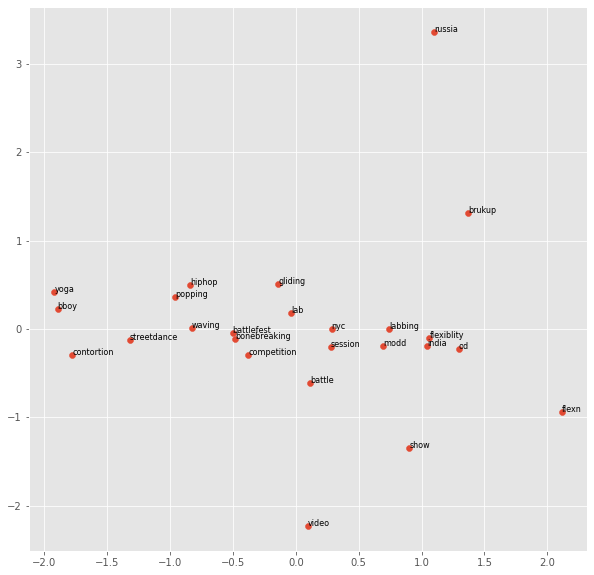

In [22]:

w = w2v(
    filtered_lines,
    min_count=1,  
    sg = 1,       
    window=7      
)       

theList=[]
wordIndex = ["battle","brukup","session","competition","flexn","bonebreaking","nyc","modd","lab","labbing","waving","gliding","flexiblity","contortion","yoga",'show',"video","od","battlefest","popping","hiphop","bboy","india","streetdance","russia"]

for i in range(0,len(wordIndex)):
    theList.append(w.wv[wordIndex[i]])

from sklearn.decomposition import PCA
pca = PCA(2)
fit=pca.fit_transform(theList)
plt.figure(figsize=(10,10))

plt.scatter(fit[:,0],fit[:,1])

for i in range(len(wordIndex)):
    plt.text(fit[i,0],fit[i,1],wordIndex[i], fontsize=8,wrap=True)

plt.show()

words such as bonebreaking and waving  are assocatied associaed with flexn are closey related.  Another key highlight of the visualzation is that video and show are closey related. words such as contortion that are more  loosely assocatied with the dance such are farther apart from the center cluster. Words that are slang to repensent events such as session and battle are also closey related. 

## Ngram and skipgram creation

In [23]:
from nltk.util import ngrams
theGrams = ngrams(lines, 4)

In [24]:
theFinList = []
for i in range(0,len(lines)):
    theGrams = ngrams(lines[i],3)

    bigrams_c = {}
    for b in theGrams:
        if b not in bigrams_c:
            bigrams_c[b] = 1
        else:
            bigrams_c[b] += 1
    theFinList.append(bigrams_c)


In [25]:
theFinList[5]
theCombineList = []
for element in theFinList:
    for key in element.keys():
        theCombineList.append(key)


In [26]:
import collections
theCounts=collections.Counter(theCombineList)

## Deep learining(word 2 vec creation)

In [27]:
#create skipgrams

word_index = {}
i = 1

for element in filtered_lines:
    for word in element:
        if word not in word_index.keys():
            word_index[word] = i
            i = i + 1
        


        
#skipgram creation

window_size = 2


vocabulary_size = len(word_index.keys())

positive_skip_grams, _ = sequence.skipgrams(filtered_lines[0], 
                                  vocabulary_size=vocabulary_size,
                                  window_size=window_size,
                                  negative_samples=0)

In [28]:


skipgrams = [(word_index[gram[0]],word_index[gram[1]]) for gram in positive_skip_grams]

In [29]:

print(tf.__version__)


X = np.zeros((len(word_index.keys()),len(skipgrams)))
y = np.zeros((len(word_index.keys()),len(skipgrams)))

for j in range(len(skipgrams)):
    gram = skipgrams[j]
    X[gram[1],j] = 1
    y[gram[0],j] = 1
    


model = Sequential()

# Hidden Layer
model.add(Dense(5, input_shape=(len(word_index.keys()),)))

# output Layer
model.add(Dense(len(word_index.keys()), activation='softmax'))

model.compile(optimizer = 'SGD',
                 loss = 'categorical_crossentropy')

model.fit(X.transpose(),
           y.transpose(),
           epochs = 200,
           batch_size = 1)

2.10.0


2022-12-07 13:43:47.268921: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-07 13:43:47.273869: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-07 13:43:47.273945: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-12-07 13:43:47.287661: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
86/86 [==============================] - 2s 9ms/step - loss: 10.3448
Epoch 2/200
86/86 [==============================] - 1s 6ms/step - loss: 10.3027
Epoch 3/200
86/86 [==============================] - 1s 8ms/step - loss: 10.2606
Epoch 4/200
86/86 [==============================] - 1s 7ms/step - loss: 10.2186
Epoch 5/200
86/86 [==============================] - 1s 7ms/step - loss: 10.1765
Epoch 6/200
86/86 [==============================] - 1s 7ms/step - loss: 10.1344
Epoch 7/200
86/86 [==============================] - 1s 8ms/step - loss: 10.0923
Epoch 8/200
86/86 [==============================] - 1s 6ms/step - loss: 10.0502
Epoch 9/200
86/86 [==============================] - 1s 9ms/step - loss: 10.0080
Epoch 10/200
86/86 [==============================] - 1s 7ms/step - loss: 9.9658
Epoch 11/200
86/86 [==============================] - 1s 7ms/step - loss: 9.9236
Epoch 12/200
86/86 [==============================] - 1s 7ms/step - loss: 9.8812
Epoch 13/200
86/86 [========

86/86 [==============================] - 1s 9ms/step - loss: 3.2151
Epoch 103/200
86/86 [==============================] - 1s 6ms/step - loss: 3.2122
Epoch 104/200
86/86 [==============================] - 1s 6ms/step - loss: 3.2146
Epoch 105/200
86/86 [==============================] - 1s 6ms/step - loss: 3.2100
Epoch 106/200
86/86 [==============================] - 1s 7ms/step - loss: 3.2132
Epoch 107/200
86/86 [==============================] - 1s 7ms/step - loss: 3.2014
Epoch 108/200
86/86 [==============================] - 1s 6ms/step - loss: 3.2182
Epoch 109/200
86/86 [==============================] - 1s 8ms/step - loss: 3.2103
Epoch 110/200
86/86 [==============================] - 1s 7ms/step - loss: 3.1989
Epoch 111/200
86/86 [==============================] - 1s 8ms/step - loss: 3.2040
Epoch 112/200
86/86 [==============================] - 0s 6ms/step - loss: 3.2045
Epoch 113/200
86/86 [==============================] - 1s 7ms/step - loss: 3.1952
Epoch 114/200
86/86 [=========

brukup
flexn
gliding
bonebreaking
waving
streetdance
battle
yoga
popping
bboy
video
battlefest
hiphop
nyc
india
show
lab
contortion
modd
session
russia
flexiblity
competition
od
labbing


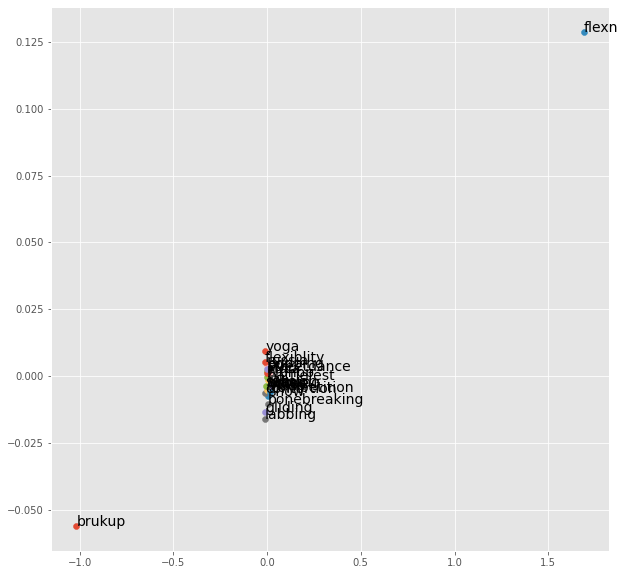

In [30]:
np_config.enable_numpy_behavior()
reverse_index = {i:word for word,i in word_index.items()}
pca = PCA(2)
fit=pca.fit_transform(model.weights[0])
plt.figure(figsize=(10,10))

theI =0
for key in word_index:
    if(key in wordIndex):
        print(key)
        plt.scatter(fit[theI,0],fit[theI,1])
        plt.text(fit[theI,0],fit[theI,1],key, fontsize=14)
    theI += 1

plt.show()



More anaysis needed to be done in order to have better speration within the plot. More layers need to be added to the neural network and more epochs need to be used while training.

# topic modeling analysis 

In [31]:
from nltk.corpus import gutenberg
import re
from sklearn.feature_extraction.text import TfidfVectorizer


#processing
emma_paras=[]
for paragraph in filtered_lines:
    #para=paragraph[0]
    #removing the double-dash from all words
    #para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    #print(para)
    emma_paras.append(' '.join(paragraph))
    #print(paragraph)
    #emma_paras.append(paragraph)

# Creating the tf-idf matrix.
#vectorizer = TfidfVectorizer(stop_words='english')

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])



#Reshapes the vectorizer output into something people can read
emma_paras_tfidf_csr = emma_paras_tfidf.tocsr()

#number of paragraphs
n = emma_paras_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*emma_paras_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = emma_paras_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', emma_paras[5])
print('Tf_idf vector:', tfidf_bypara[5])


# Getting the word list.
terms = vectorizer.get_feature_names()

# Number of topics.
ntopics=5

# Linking words to topics
def word_topic(tfidf,solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

# Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=[x for x in chosenlist]
    return(topwords)

# Number of words to look at for each topic.
n_top_words = 5

Number of features: 10723
Original sentence: got explorepage jacquees brukup youngmoneyradio viral flexnbrooklyn explore freeformbrukup trending birdmann primetimen flexn flexnrussia nymcmb cashmoney youngmoney youngmoneyn worldofdance nhttpstco0vcsjeu2mr
Tf_idf vector: {'youngmoneyn': 0.30896302442669815, 'youngmoney': 0.2997006889988101, 'cashmoney': 0.2866461604228865, 'nymcmb': 0.30896302442669815, 'birdmann': 0.30896302442669815, 'flexnbrooklyn': 0.24953399639086316, 'youngmoneyradio': 0.30896302442669815, 'jacquees': 0.2735916318469629, 'got': 0.14164933198819077, 'flexnrussia': 0.2866461604228865, 'explore': 0.18300985338242504, 'worldofdance': 0.17053285471355817, 'trending': 0.18093194346714445, 'freeformbrukup': 0.1861644726461811, 'viral': 0.18366030841471656, 'brukup': 0.10722230174968453, 'explorepage': 0.17786329602757228}


In [32]:


svd= TruncatedSVD(ntopics)
lsa = make_pipeline(svd, Normalizer(copy=False))
emma_paras_lsa = lsa.fit_transform(emma_paras_tfidf)

components_lsa = word_topic(emma_paras_tfidf, emma_paras_lsa, terms)

topwords=pd.DataFrame()
topwords['LSA']=top_words(components_lsa, n_top_words) 




lda = LDA(n_components=ntopics, 
          doc_topic_prior=None, # Prior = 1/n_documents
          topic_word_prior=1/ntopics,
          learning_decay=0.7, # Convergence rate.
          learning_offset=10.0, # Causes earlier iterations to have less influence on the learning
          max_iter=10, # when to stop even if the model is not converging (to prevent running forever)
          evaluate_every=-1, # Do not evaluate perplexity, as it slows training time.
          mean_change_tol=0.001, # Stop updating the document topic distribution in the E-step when mean change is < tol
          max_doc_update_iter=100, # When to stop updating the document topic distribution in the E-step even if tol is not reached
          n_jobs=-1, # Use all available CPUs to speed up processing time.
          verbose=0, # amount of output to give while iterating
          random_state=0
         )

emma_paras_lda = lda.fit_transform(emma_paras_tfidf) 

components_lda = word_topic(emma_paras_tfidf, emma_paras_lda, terms)

topwords['LDA']=top_words(components_lda, n_top_words)





nmf = NMF(alpha=0.0, 
          init='nndsvdar', # how starting value are calculated
          l1_ratio=0.0, # Sets whether regularization is L2 (0), L1 (1), or a combination (values between 0 and 1)
          max_iter=200, # when to stop even if the model is not converging (to prevent running forever)
          n_components=ntopics, 
          random_state=0, 
          solver='cd', # Use Coordinate Descent to solve
          tol=0.0001, # model will stop if tfidf-WH <= tol
          verbose=0 # amount of output to give while iterating
         )
emma_paras_nmf = nmf.fit_transform(emma_paras_tfidf) 

components_nmf = word_topic(emma_paras_tfidf, emma_paras_nmf, terms)

topwords['NNMF']=top_words(components_nmf, n_top_words)

In [33]:
for topic in range(ntopics):
    print('Topic {}:'.format(topic))
    print(topwords.loc[topic])

Topic 0:
                        LSA                 LDA                     NNMF
0                 new 331.5  bonebreaking 76.79              music 40.65
0              music 289.87        duquaye 76.4                new 40.27
0            duquaye 289.56             gt 73.8            duquaye 40.12
0   httptcoty0lihus9c 209.1         check 69.88  httptcoty0lihus9c 33.57
0  nhttptcoty0lihus9c 75.32           new 66.34  nhttptcoty0lihus9c 10.9
Topic 1:
                   LSA                       LDA                NNMF
1  bonebreaking 355.39                new 192.64  bonebreaking 32.63
1         dance 201.03              music 181.37         dance 11.13
1        brukup 171.03            duquaye 180.13        flexing 4.18
1          like 124.77  httptcoty0lihus9c 144.71         dancer 3.99
1           amp 103.37        bonebreaking 56.41      bonebreak 3.21
Topic 2:
                  LSA                 LDA                NNMF
2         like 158.05        brukup 87.16          like 22.

There are different topics associated with comeptions and oter flexn events. Concepts such as bonebreaking end up in mutiple topics due to its popularity. Words that are also assocatied with different usermanes and hashtags are also in the topics. Based off the words, LSA is the best method to use for the dataset.

## Setnetiment Analysis 

In [34]:

sia = SentimentIntensityAnalyzer()
#sia.polarity_scores("that move was OD")

theString = ""
theFin = []
theOn = 0
for i in range(0,len(filtered_lines)):
    for j in range(0,len(filtered_lines[i])):
        theString = theString + filtered_lines[i][j] + " "
        if(filtered_lines[i][j] in wordIndex):
            theOn = 1
    if(i == 300):
        break
    if theOn == 1:
        theFin.append(sia.polarity_scores(theString))
    theOn = 0

In [35]:
negAvg = 0
neuAvg = 0
posAvg = 0

for i in range(0, len(theFin)):
    negAvg  += theFin[i]["neg"]
    neuAvg  += theFin[i]["neu"]
    posAvg  += theFin[i]["pos"]
print(negAvg/len(theFin))
print(neuAvg/len(theFin))
print(posAvg/len(theFin))

0.0351916376306619
0.8587282229965161
0.10613240418118457


The sentiement of posts are a net postive due to the nature of the dance trend. Futermore, the usage of slang influences the sentiemnt of posts and tend to be netural.